In [1]:
import numpy as np

from PySDM import Formulae
from PySDM.physics import si
from matplotlib import pyplot

In [2]:
formulae = Formulae(
    terminal_velocity="RogersYau",
    isotope_diffusivity_ratios="HellmannAndHarvey2020",
    ventilation="Froessling1938",
    particle_shape_and_density="LiquidSpheres",
    air_dynamic_viscosity="ZografosEtAl1987",
)

In [3]:
def f_iso_to_f(f):
    D_heavy_to_light = formulae.isotope_diffusivity_ratios.ratio_18O(temperature)
    return (1 + (f-1)*(D_heavy_to_light)**(1/3)) / f

In [6]:
n = 20
temperature = np.linspace(273.15, 293.15, n) *si.K
temperature = 193.15 * si.K
radius = np.linspace(2, 100, n) * si.mm

eta_air = formulae.air_dynamic_viscosity.eta_air(temperature)
air_density = formulae.constants.p_STP / formulae.constants.Rd / temperature
f = formulae.ventilation.ventilation_coefficient(
    formulae.trivia.sqrt_re_times_cbrt_sc(
        Re = formulae.particle_shape_and_density.reynolds_number(
            radius = radius, 
            velocity_wrt_air=formulae.terminal_velocity.v_term(radius), 
            dynamic_viscosity = eta_air, 
            density = air_density
        ), 
        Sc = formulae.trivia.air_schmidt_number(
            dynamic_viscosity=eta_air,
            diffusivity=formulae.diffusion_thermics.D(T=temperature, p=formulae.constants.p_STP),
            density=air_density,
        )
    )
)
f_ratio = f_iso_to_f(f)

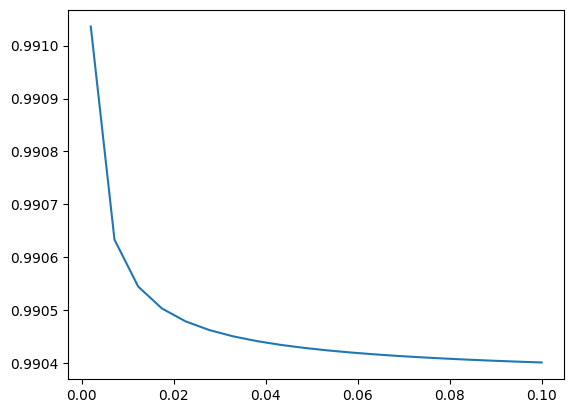

In [7]:
#pyplot.plot(temperature, f_ratio)
pyplot.plot(radius, f_ratio)